In [22]:
import tensorflow as tf
from keras import models,layers
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback
import numpy as np
from keras.preprocessing import image

In [16]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
     "potato_data",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 2151 files belonging to 3 classes.


In [17]:
class_name=ds.class_names
batch_size=32


In [18]:
for image_batch,label_batch in ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 2 1 2 0 0 1 0 0 0 2 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0]


2025-01-16 20:05:01.790339: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


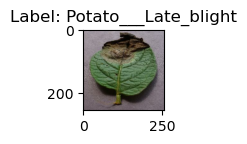

(256, 256, 3)


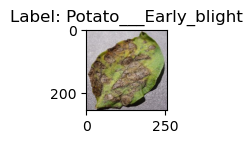

(256, 256, 3)


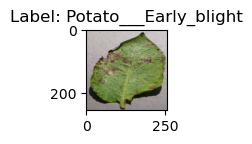

(256, 256, 3)


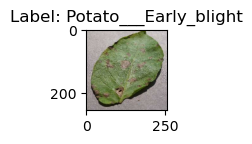

(256, 256, 3)


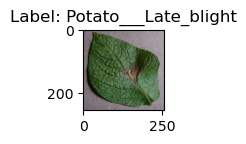

(256, 256, 3)


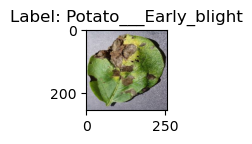

(256, 256, 3)


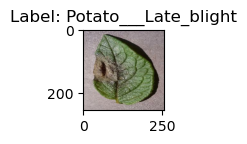

(256, 256, 3)


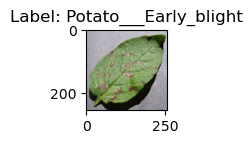

(256, 256, 3)


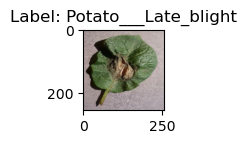

(256, 256, 3)


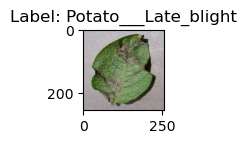

(256, 256, 3)


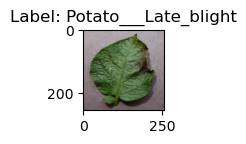

(256, 256, 3)


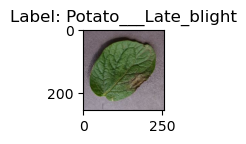

(256, 256, 3)


In [19]:
for image_batch,label_batch in ds.take(1):
    for i in range(12):
         ax=plt.subplot(4,3,i+1)
         plt.imshow(image_batch[i].numpy().astype("uint8"))
         plt.title(f"Label: {class_name[label_batch[i].numpy()]}")
         plt.show()
         print(image_batch[0].shape)

In [26]:
def get_dataset(ds,train_split=0.8,test_split=0.1,val_spilt=0.1,shuffle=True,shuffle_size=100000):
    if(shuffle):
        ds=ds.shuffle(shuffle_size,seed=12)
    
    total=len(ds)
    
    train_size=int(total*train_split)
    test_size=int(total*test_split)

    train_data=ds.take(train_size)
    test_data=ds.skip(train_size).take(test_size)
    val_data=ds.skip(train_size).skip(test_size)

    return train_data,test_data,val_data
    

In [27]:
train_data,test_data,val_data=get_dataset(ds)

In [28]:
len(train_data)

54

In [29]:
len(test_data)

6

In [30]:
len(val_data)

8

In [31]:
train_ds = train_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)


In [32]:
model_datapre = tf.keras.Sequential([
    # Resize the images to 256x256
    layers.Resizing(256, 256),  # Rescale the pixel values to the range [0, 1]
    layers.Rescaling(1./255),
    
    layers.RandomFlip('horizontal'),  # Randomly flip images horizontally
    layers.RandomRotation(0.2),       # Randomly rotate images by up to 20%
    layers.RandomZoom(0.2),     
])


In [28]:
image_shape=(32,256,256,3)
model=tf.keras.Sequential([
    model_datapre,

    layers.Conv2D(32,(3,3),activation='relu',input_shape=image_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])
model.build(input_shape=image_shape)

/Users/rahulpatil/miniconda3/envs/potato_project/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [31]:
debug_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: loss={logs['loss']}, accuracy={logs.get('accuracy')}")
)

model.fit(
    train_ds,
    epochs=50,  # Start with fewer epochs for debugging
    batch_size=batch_size,
    validation_data=val_data,
    callbacks=[debug_callback],
    verbose=1
)


Epoch 1/50


/Users/rahulpatil/miniconda3/envs/potato_project/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1: loss=0.8952052593231201, accuracy=0.53761571645736690m 641ms/step - accuracy: 0.4784 - loss: 0.9462 
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 681ms/step - accuracy: 0.4795 - loss: 0.9453 - val_accuracy: 0.6953 - val_loss: 0.8179
Epoch 2/50
Epoch 2: loss=0.7081091403961182, accuracy=0.671875m 0s 643ms/step - accuracy: 0.6281 - loss: 0.7920 
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 679ms/step - accuracy: 0.6289 - loss: 0.7905 - val_accuracy: 0.7461 - val_loss: 0.5695
Epoch 3/50
Epoch 3: loss=0.4493398070335388, accuracy=0.80787038803100590m 684ms/step - accuracy: 0.7813 - loss: 0.4949 
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 738ms/step - accuracy: 0.7818 - loss: 0.4941 - val_accuracy: 0.8047 - val_loss: 0.5044
Epoch 4/50
Epoch 4: loss=0.3653598129749298, accuracy=0.84837961196899410m 713ms/step - accuracy: 0.8419 - loss: 0.3686 
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 758ms/step - accuracy: 0.8420 - loss: 0.3686 - val_accuracy: 0.8164 - val_loss: 0.4665
Epoch 5/50
Epoch 5: loss=0.32349687814712524, accuracy=0.869212

In [33]:
model.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9635 - loss: 0.1054


[0.1328413039445877, 0.9583333134651184]

In [34]:
val_accuracy = model.history.params
print(val_accuracy)

{'verbose': 'auto', 'epochs': 1, 'steps': 6}


Image


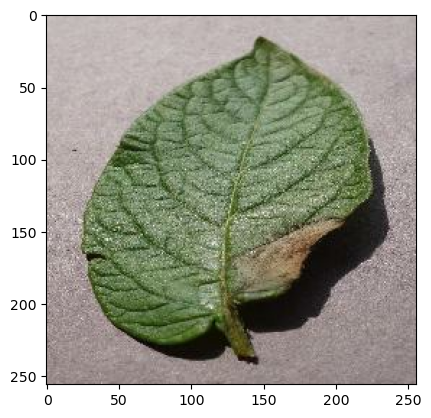

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Actual disease: Potato___Late_blight
Predicted disease: Potato___Late_blight


2025-01-14 11:41:48.703911: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
for batch, label in test_data.take(1):
    # Display the first image in the batch
    print("Image")
    plt.imshow(batch[0].numpy().astype('uint8'))
    plt.show()

    # Predict the class for the batch
    predicted_test = model.predict(batch)

    # Get the predicted class for the first image in the batch
    predicted_class = np.argmax(predicted_test[0])  # First image in the batch

    # Print the actual and predicted labels
    print("Actual disease:", class_name[label[0]])  # Actual label (for the first image)
    print("Predicted disease:", class_name[predicted_class])  # Predicted class

In [52]:
def function(img):
    img_array=img.numpy();
    img_array=tf.expand_dims(img,0)

    prediction = model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction[0])]
    confidance=round(100*(np.max(prediction[0])),2)
    return predicted_class, confidance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


2025-01-14 11:50:52.244603: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


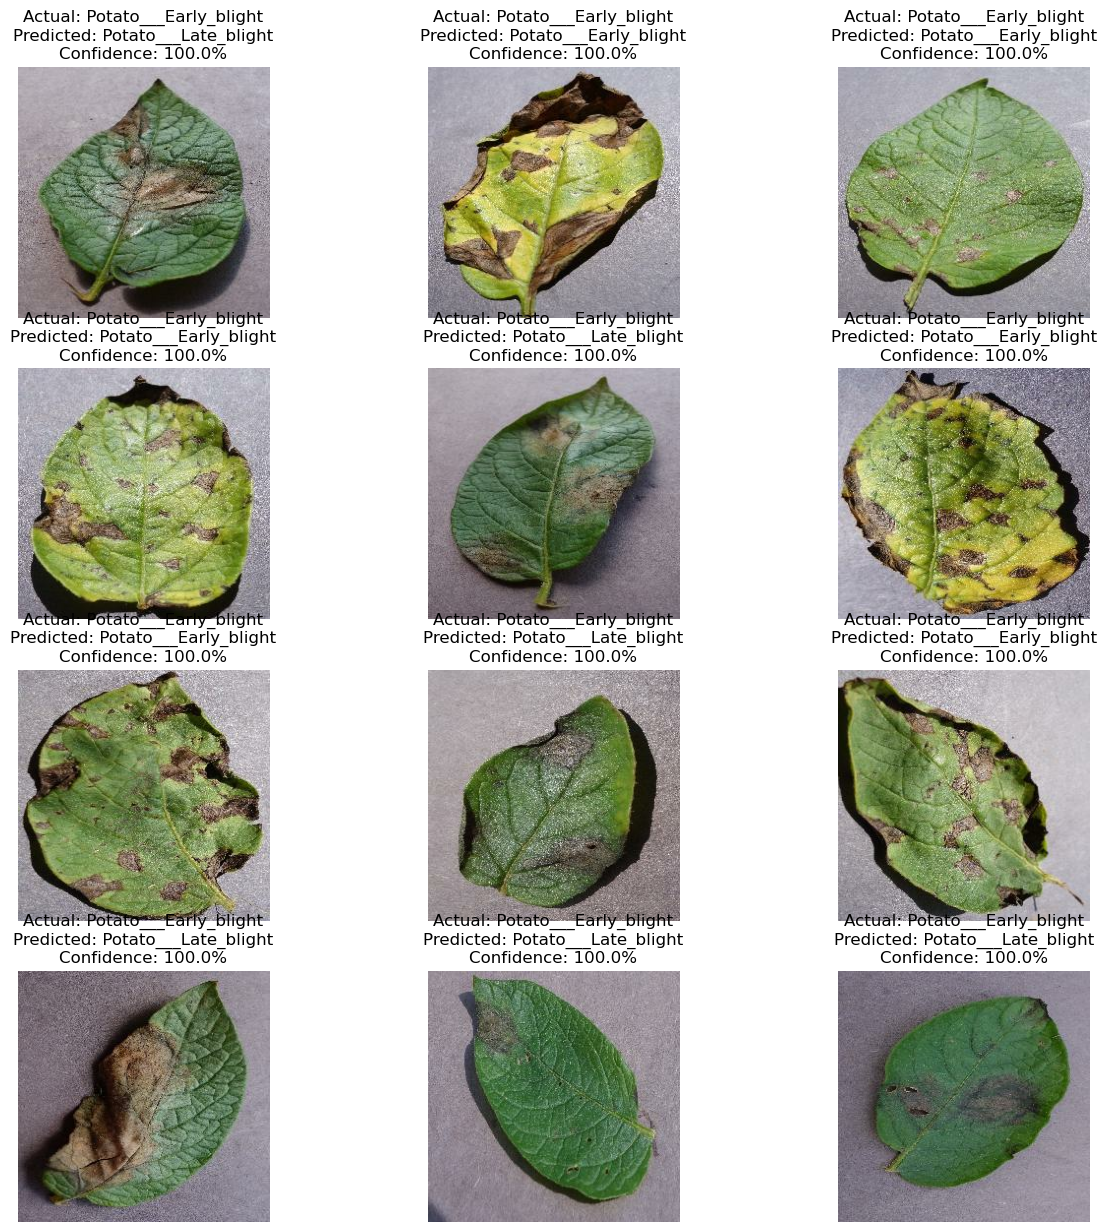

In [54]:
plt.figure(figsize=(15,15))
for batch,label in test_data.take(1):
    for i in range(12):
        pred,con=function(batch[i])
        
        plt.subplot(4, 3, i + 1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.axis("off")

        
        plt.title(f"Actual: {actual_class}\nPredicted: {pred}\nConfidence: {conf}%")
        
        

In [62]:
model_num=1

model.save(f"/Users/rahulpatil/Desktop/potato_project/modelh5/model_{model_num}.h5")

In [64]:
model_num = 1
model.export(f"/Users/rahulpatil/Desktop/potato_project/modeltens/model_{model_num}")

INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_1/assets


INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_1/assets


Saved artifact at '/Users/rahulpatil/Desktop/potato_project/modeltens/model_1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6035746912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012264592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012261424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5901483200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921609280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5913480000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921173776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5916423296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175008: TensorSpec

In [65]:
model_num = 2
model.export(f"/Users/rahulpatil/Desktop/potato_project/modeltens/model_{model_num}")

INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_2/assets


INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_2/assets


Saved artifact at '/Users/rahulpatil/Desktop/potato_project/modeltens/model_2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6035746912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012264592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012261424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5901483200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921609280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5913480000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921173776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5916423296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175008: TensorSpec

In [66]:
model_num = 3
model.export(f"/Users/rahulpatil/Desktop/potato_project/modeltens/model_{model_num}")

INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_3/assets


INFO:tensorflow:Assets written to: /Users/rahulpatil/Desktop/potato_project/modeltens/model_3/assets


Saved artifact at '/Users/rahulpatil/Desktop/potato_project/modeltens/model_3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6035746912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012264592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6012261424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5901483200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921609280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5913480000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921173776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5916423296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5921175008: TensorSpec

In [39]:
mod = tf.saved_model.load('/Users/rahulpatil/Desktop/potato_project/modelh5/model_1.h5')

OSError: SavedModel file does not exist at: /Users/rahulpatil/Desktop/potato_project/modelh5/model_1.h5/{saved_model.pbtxt|saved_model.pb}

In [34]:
def function(img):
    img_array=img.numpy();
    img_array=tf.expand_dims(img,0)

    prediction = mod.predict(img_array)
    predicted_class = class_name[np.argmax(prediction[0])]
    confidance=round(100*(np.max(prediction[0])),2)
    return predicted_class, confidance

In [35]:
plt.figure(figsize=(15,15))
for batch,label in test_data.take(1):
    for i in range(12):
        pred,con=function(batch[i])
        
        plt.subplot(4, 3, i + 1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.axis("off")

        
        plt.title(f"Actual: {actual_class}\nPredicted: {pred}\nConfidence: {conf}%")
        
        

AttributeError: '_UserObject' object has no attribute 'predict'

<Figure size 1500x1500 with 0 Axes>